In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## CS610 AI Tools and Paradigms: Final Project
### By: Jessie Bernitt, Kirat Mokha & Tyler Graham

### Baseline Model
#### Part 1: Clean the Data!

In [41]:
df = pd.read_csv('dataset.csv')
df.head(100)

Disease   Symptom_1              Symptom_2  \
0   Fungal infection     itching              skin_rash   
1   Fungal infection   skin_rash   nodal_skin_eruptions   
2   Fungal infection     itching   nodal_skin_eruptions   
3   Fungal infection     itching              skin_rash   
4   Fungal infection     itching              skin_rash   
..               ...         ...                    ...   
95  Bronchial Asthma     fatigue                  cough   
96  Bronchial Asthma     fatigue                  cough   
97  Bronchial Asthma     fatigue                  cough   
98  Bronchial Asthma       cough             high_fever   
99  Bronchial Asthma     fatigue             high_fever   

                Symptom_3             Symptom_4        Symptom_5  \
0    nodal_skin_eruptions   dischromic _patches              NaN   
1     dischromic _patches                   NaN              NaN   
2     dischromic _patches                   NaN              NaN   
3     dischromic _patches                   NaN              NaN   
4    nodal_skin_eruptions                   NaN              NaN   
..                    ...                   ...              ...   
95             high_fever        breathlessness    mucoid_sputum   
96             high_fever        breathlessness   family_history   
97             high_fever        breathlessness   family_history   
98         breathlessness        family_history    mucoid_sputum   
99         breathlessness        family_history    mucoid_sputum   

         Symptom_6 Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11  \
0              NaN       NaN       NaN       NaN        NaN        NaN   
1              NaN       NaN       NaN       NaN        NaN        NaN   
2              NaN       NaN       NaN       NaN        NaN        NaN   
3              NaN       NaN       NaN       NaN        NaN        NaN   
4              NaN       NaN       NaN       NaN        NaN        NaN   
..             ...       ...       ...       ...        ...        ...   
95             NaN       NaN       NaN       NaN        NaN        NaN   
96             NaN       NaN       NaN       NaN        NaN        NaN   
97   mucoid_sputum       NaN       NaN       NaN        NaN        NaN   
98             NaN       NaN       NaN       NaN        NaN        NaN   
99             NaN       NaN       NaN       NaN        NaN        NaN   

   Symptom_12 Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
0         NaN        NaN        NaN        NaN        NaN        NaN  
1         NaN        NaN        NaN        NaN        NaN        NaN  
2         NaN        NaN        NaN        NaN        NaN        NaN  
3         NaN        NaN        NaN        NaN        NaN        NaN  
4         NaN        NaN        NaN        NaN        NaN        NaN  
..        ...        ...        ...        ...        ...        ...  
95        NaN        NaN        NaN        NaN        NaN        NaN  
96        NaN        NaN        NaN        NaN        NaN        NaN  
97        NaN        NaN        NaN        NaN        NaN        NaN  
98        NaN        NaN        NaN        NaN        NaN        NaN  
99        NaN        NaN        NaN        NaN        NaN        NaN  

[100 rows x 18 columns]

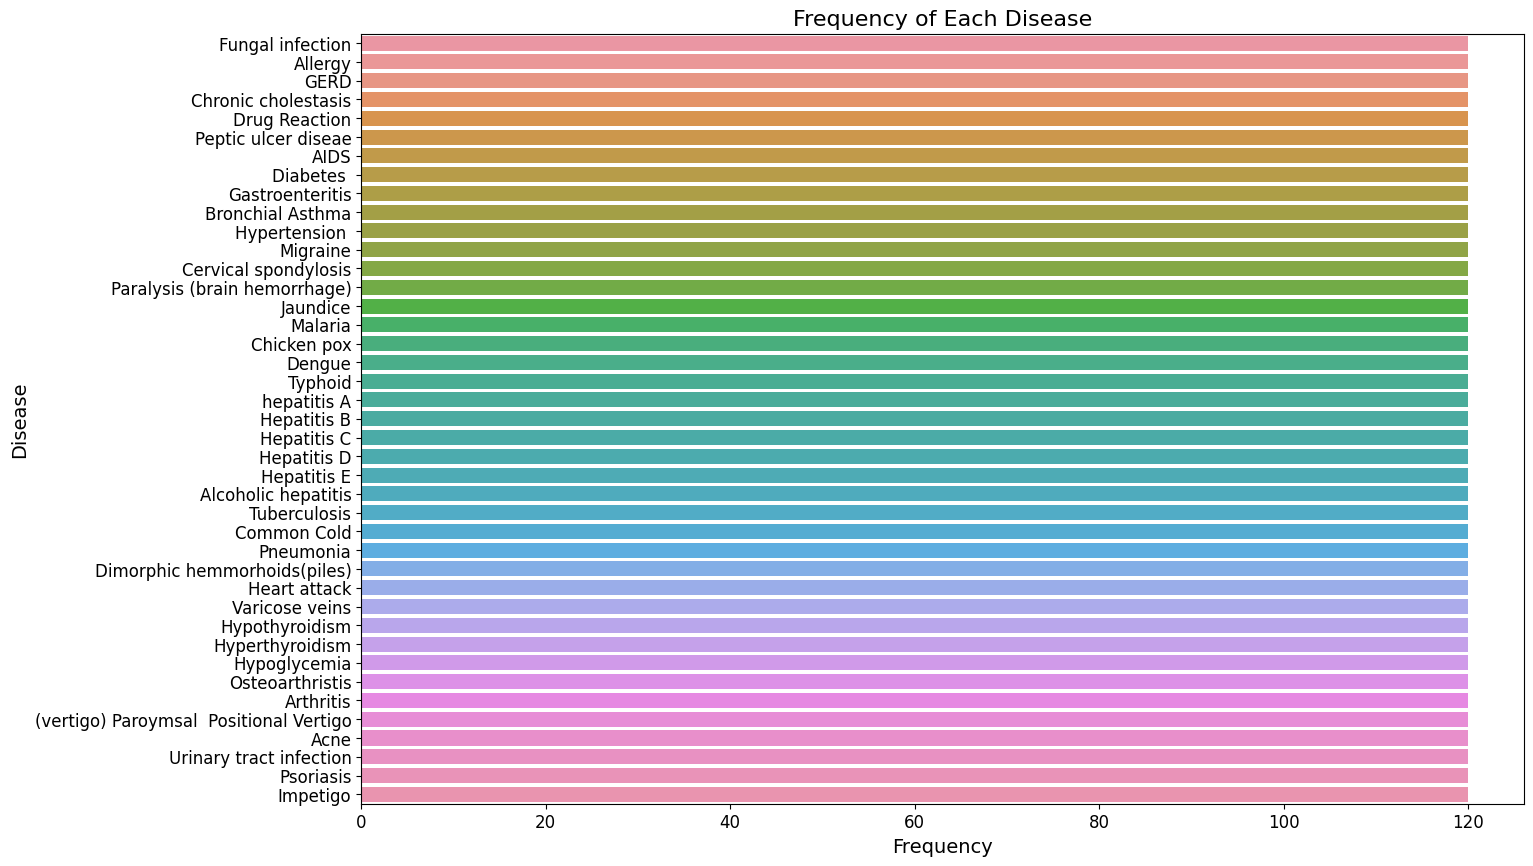

In [42]:
sns.set_palette("deep")

# Count the frequency of each disease
disease_counts = df['Disease'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Frequency']

# Increase the figure size for better spacing and readability
plt.figure(figsize=(15, 10))  # Adjusting the size here; you can modify these values as needed

# Recreate the bar plot with the adjusted figure size
sns.barplot(x='Frequency', y='Disease', data=disease_counts)

# Adding plot title and labels with increased font size
plt.title('Frequency of Each Disease', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Disease', fontsize=14)

# Optionally, increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the updated plot
plt.show()

### Step 2: Create inverted dataframe

In [43]:
symptoms = []

for cols in df.columns[1:]:
    symptoms.append(df[cols].unique().tolist())
    
symptom_list = sum(symptoms, [])
unique_symptoms = set(symptom_list)
unique_symptoms = [x for x in unique_symptoms if str(x) != 'nan']
# unique_symptoms = [x.lstrip() for x in unique_symptoms]
    
print(unique_symptoms)

[' cold_hands_and_feets', ' coma', ' breathlessness', ' passage_of_gases', ' anxiety', ' patches_in_throat', ' abdominal_pain', ' diarrhoea', ' nausea', ' fast_heart_rate', ' vomiting', ' irritation_in_anus', ' spinning_movements', ' enlarged_thyroid', ' sunken_eyes', ' ulcers_on_tongue', ' sinus_pressure', ' weight_loss', ' receiving_unsterile_injections', ' painful_walking', ' swollen_extremeties', ' swollen_blood_vessels', ' yellow_crust_ooze', ' blister', ' joint_pain', ' irregular_sugar_level', ' dark_urine', ' throat_irritation', ' brittle_nails', ' swelling_joints', ' skin_rash', ' movement_stiffness', ' receiving_blood_transfusion', ' bloody_stool', ' sweating', ' redness_of_eyes', ' dizziness', ' runny_nose', ' slurred_speech', ' skin_peeling', ' swelling_of_stomach', ' unsteadiness', ' toxic_look_(typhos)', ' nodal_skin_eruptions', ' mucoid_sputum', ' stomach_bleeding', ' inflammatory_nails', ' burning_micturition', ' red_sore_around_nose', ' high_fever', ' back_pain', ' mood

In [44]:
cleaned_df = pd.DataFrame(columns=unique_symptoms)
cleaned_df['Disease'] = df['Disease']
cleaned_df.head()

cold_hands_and_feets  coma  breathlessness  passage_of_gases  anxiety  \
0                   NaN   NaN             NaN               NaN      NaN   
1                   NaN   NaN             NaN               NaN      NaN   
2                   NaN   NaN             NaN               NaN      NaN   
3                   NaN   NaN             NaN               NaN      NaN   
4                   NaN   NaN             NaN               NaN      NaN   

   patches_in_throat  abdominal_pain  diarrhoea  nausea  fast_heart_rate  \
0                NaN             NaN        NaN     NaN              NaN   
1                NaN             NaN        NaN     NaN              NaN   
2                NaN             NaN        NaN     NaN              NaN   
3                NaN             NaN        NaN     NaN              NaN   
4                NaN             NaN        NaN     NaN              NaN   

   vomiting  irritation_in_anus  spinning_movements  enlarged_thyroid  \
0       NaN                 NaN                 NaN               NaN   
1       NaN                 NaN                 NaN               NaN   
2       NaN                 NaN                 NaN               NaN   
3       NaN                 NaN                 NaN               NaN   
4       NaN                 NaN                 NaN               NaN   

   sunken_eyes  ulcers_on_tongue  sinus_pressure  weight_loss  \
0          NaN               NaN             NaN          NaN   
1          NaN               NaN             NaN          NaN   
2          NaN               NaN             NaN          NaN   
3          NaN               NaN             NaN          NaN   
4          NaN               NaN             NaN          NaN   

   receiving_unsterile_injections  painful_walking  swollen_extremeties  \
0                             NaN              NaN                  NaN   
1                             NaN              NaN                  NaN   
2                             NaN              NaN                  NaN   
3                             NaN              NaN                  NaN   
4                             NaN              NaN                  NaN   

   swollen_blood_vessels  yellow_crust_ooze  blister  joint_pain  \
0                    NaN                NaN      NaN         NaN   
1                    NaN                NaN      NaN         NaN   
2                    NaN                NaN      NaN         NaN   
3                    NaN                NaN      NaN         NaN   
4                    NaN                NaN      NaN         NaN   

   irregular_sugar_level  dark_urine  throat_irritation  brittle_nails  \
0                    NaN         NaN                NaN            NaN   
1                    NaN         NaN                NaN            NaN   
2                    NaN         NaN                NaN            NaN   
3                    NaN         NaN                NaN            NaN   
4                    NaN         NaN                NaN            NaN   

   swelling_joints  skin_rash  movement_stiffness  \
0              NaN        NaN                 NaN   
1              NaN        NaN                 NaN   
2              NaN        NaN                 NaN   
3              NaN        NaN                 NaN   
4              NaN        NaN                 NaN   

   receiving_blood_transfusion  bloody_stool  sweating  redness_of_eyes  \
0                          NaN           NaN       NaN              NaN   
1                          NaN           NaN       NaN              NaN   
2                          NaN           NaN       NaN              NaN   
3                          NaN           NaN       NaN              NaN   
4                          NaN           NaN       NaN              NaN   

   dizziness  runny_nose  slurred_speech  skin_peeling  swelling_of_stomach  \
0        NaN         NaN             NaN           NaN                  NaN   
1        NaN         NaN  

In [45]:
# iterator = df.iterrows

for index,row in df.iterrows():
#     print(row)
    for col in df.columns[1:]:
        value = row[col]
        if(str(value) != 'nan'):
            cleaned_df[value][index] = 1
            
cleaned_df.head(100)

cold_hands_and_feets  coma  breathlessness  passage_of_gases  anxiety  \
0                    NaN   NaN             NaN               NaN      NaN   
1                    NaN   NaN             NaN               NaN      NaN   
2                    NaN   NaN             NaN               NaN      NaN   
3                    NaN   NaN             NaN               NaN      NaN   
4                    NaN   NaN             NaN               NaN      NaN   
..                   ...   ...             ...               ...      ...   
95                   NaN   NaN               1               NaN      NaN   
96                   NaN   NaN               1               NaN      NaN   
97                   NaN   NaN               1               NaN      NaN   
98                   NaN   NaN               1               NaN      NaN   
99                   NaN   NaN               1               NaN      NaN   

    patches_in_throat  abdominal_pain  diarrhoea  nausea  fast_heart_rate  \
0                 NaN             NaN        NaN     NaN              NaN   
1                 NaN             NaN        NaN     NaN              NaN   
2                 NaN             NaN        NaN     NaN              NaN   
3                 NaN             NaN        NaN     NaN              NaN   
4                 NaN             NaN        NaN     NaN              NaN   
..                ...             ...        ...     ...              ...   
95                NaN             NaN        NaN     NaN              NaN   
96                NaN             NaN        NaN     NaN              NaN   
97                NaN             NaN        NaN     NaN              NaN   
98                NaN             NaN        NaN     NaN              NaN   
99                NaN             NaN        NaN     NaN              NaN   

    vomiting  irritation_in_anus  spinning_movements  enlarged_thyroid  \
0        NaN                 NaN                 NaN               NaN   
1        NaN                 NaN                 NaN               NaN   
2        NaN                 NaN                 NaN               NaN   
3        NaN                 NaN                 NaN               NaN   
4        NaN                 NaN                 NaN               NaN   
..       ...                 ...                 ...               ...   
95       NaN                 NaN                 NaN               NaN   
96       NaN                 NaN                 NaN               NaN   
97       NaN                 NaN                 NaN               NaN   
98       NaN                 NaN                 NaN               NaN   
99       NaN                 NaN                 NaN               NaN   

    sunken_eyes  ulcers_on_tongue  sinus_pressure  weight_loss  \
0           NaN               NaN             NaN          NaN   
1           NaN               NaN             NaN          NaN   
2           NaN               NaN             NaN          NaN   
3           NaN               NaN             NaN          NaN   
4           NaN               NaN             NaN          NaN   
..          ...               ...             ...          ...   
95          NaN               NaN             NaN          NaN   
96          NaN               NaN             NaN          NaN   
97          NaN               NaN             NaN          NaN   
98          NaN               NaN             NaN          NaN   
99          NaN               NaN             NaN          NaN   

    receiving_unsterile_injections  painful_walking  swollen_extremeties  \
0                              NaN              NaN                  NaN   
1                              NaN              NaN                  NaN   
2                              NaN              NaN                  NaN   
3                              NaN              NaN                  NaN   
4                              NaN              NaN                  NaN   
..              

In [46]:
cleaned_df = cleaned_df.fillna(0)
pd.set_option('display.max_columns', None)
cleaned_df.head()

cold_hands_and_feets   coma   breathlessness   passage_of_gases   anxiety  \
0                      0      0                0                  0         0   
1                      0      0                0                  0         0   
2                      0      0                0                  0         0   
3                      0      0                0                  0         0   
4                      0      0                0                  0         0   

    patches_in_throat   abdominal_pain   diarrhoea   nausea   fast_heart_rate  \
0                   0                0           0        0                 0   
1                   0                0           0        0                 0   
2                   0                0           0        0                 0   
3                   0                0           0        0                 0   
4                   0                0           0        0                 0   

    vomiting   irritation_in_anus   spinning_movements   enlarged_thyroid  \
0          0                    0                    0                  0   
1          0                    0                    0                  0   
2          0                    0                    0                  0   
3          0                    0                    0                  0   
4          0                    0                    0                  0   

    sunken_eyes   ulcers_on_tongue   sinus_pressure   weight_loss  \
0             0                  0                0             0   
1             0                  0                0             0   
2             0                  0                0             0   
3             0                  0                0             0   
4             0                  0                0             0   

    receiving_unsterile_injections   painful_walking   swollen_extremeties  \
0                                0                 0                     0   
1                                0                 0                     0   
2                                0                 0                     0   
3                                0                 0                     0   
4                                0                 0                     0   

    swollen_blood_vessels   yellow_crust_ooze   blister   joint_pain  \
0                       0                   0         0            0   
1                       0                   0         0            0   
2                       0                   0         0            0   
3                       0                   0         0            0   
4                       0                   0         0            0   

    irregular_sugar_level   dark_urine   throat_irritation   brittle_nails  \
0                       0            0                   0               0   
1                       0            0                   0               0   
2                       0            0                   0               0   
3                       0            0                   0               0   
4                       0            0                   0               0   

    swelling_joints   skin_rash   movement_stiffness  \
0                 0           1                    0   
1                 0           1                    0   
2                 0           0                    0   
3                 0           1                    0   
4                 0           1                    0   

    receiving_blood_transfusion   bloody_stool   sweating   redness_of_eyes  \
0                             0              0          0                 0   
1                             0              0          0                 0   
2                             0              0          0                 0   
3                             0              0          0                 0   
4                             0              0   

### Step 3: Baseline Model

In [47]:
unique_values = cleaned_df['Disease'].unique()
le = LabelEncoder()
le.fit(unique_values)
cleaned_df['encoded_disease'] = le.transform(cleaned_df['Disease'])
    
cleaned_df.head()

cold_hands_and_feets   coma   breathlessness   passage_of_gases   anxiety  \
0                      0      0                0                  0         0   
1                      0      0                0                  0         0   
2                      0      0                0                  0         0   
3                      0      0                0                  0         0   
4                      0      0                0                  0         0   

    patches_in_throat   abdominal_pain   diarrhoea   nausea   fast_heart_rate  \
0                   0                0           0        0                 0   
1                   0                0           0        0                 0   
2                   0                0           0        0                 0   
3                   0                0           0        0                 0   
4                   0                0           0        0                 0   

    vomiting   irritation_in_anus   spinning_movements   enlarged_thyroid  \
0          0                    0                    0                  0   
1          0                    0                    0                  0   
2          0                    0                    0                  0   
3          0                    0                    0                  0   
4          0                    0                    0                  0   

    sunken_eyes   ulcers_on_tongue   sinus_pressure   weight_loss  \
0             0                  0                0             0   
1             0                  0                0             0   
2             0                  0                0             0   
3             0                  0                0             0   
4             0                  0                0             0   

    receiving_unsterile_injections   painful_walking   swollen_extremeties  \
0                                0                 0                     0   
1                                0                 0                     0   
2                                0                 0                     0   
3                                0                 0                     0   
4                                0                 0                     0   

    swollen_blood_vessels   yellow_crust_ooze   blister   joint_pain  \
0                       0                   0         0            0   
1                       0                   0         0            0   
2                       0                   0         0            0   
3                       0                   0         0            0   
4                       0                   0         0            0   

    irregular_sugar_level   dark_urine   throat_irritation   brittle_nails  \
0                       0            0                   0               0   
1                       0            0                   0               0   
2                       0            0                   0               0   
3                       0            0                   0               0   
4                       0            0                   0               0   

    swelling_joints   skin_rash   movement_stiffness  \
0                 0           1                    0   
1                 0           1                    0   
2                 0           0                    0   
3                 0           1                    0   
4                 0           1                    0   

    receiving_blood_transfusion   bloody_stool   sweating   redness_of_eyes  \
0                             0              0          0                 0   
1                             0              0          0                 0   
2                             0              0          0                 0   
3                             0              0          0                 0   
4                             0              0   

In [48]:
print(cleaned_df['Disease'].unique())
print(cleaned_df['encoded_disease'].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]


In [49]:
X = cleaned_df.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
y = cleaned_df['encoded_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [50]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.01)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

Accuracy of the Decision Tree Classifier: 93.73983739837398%


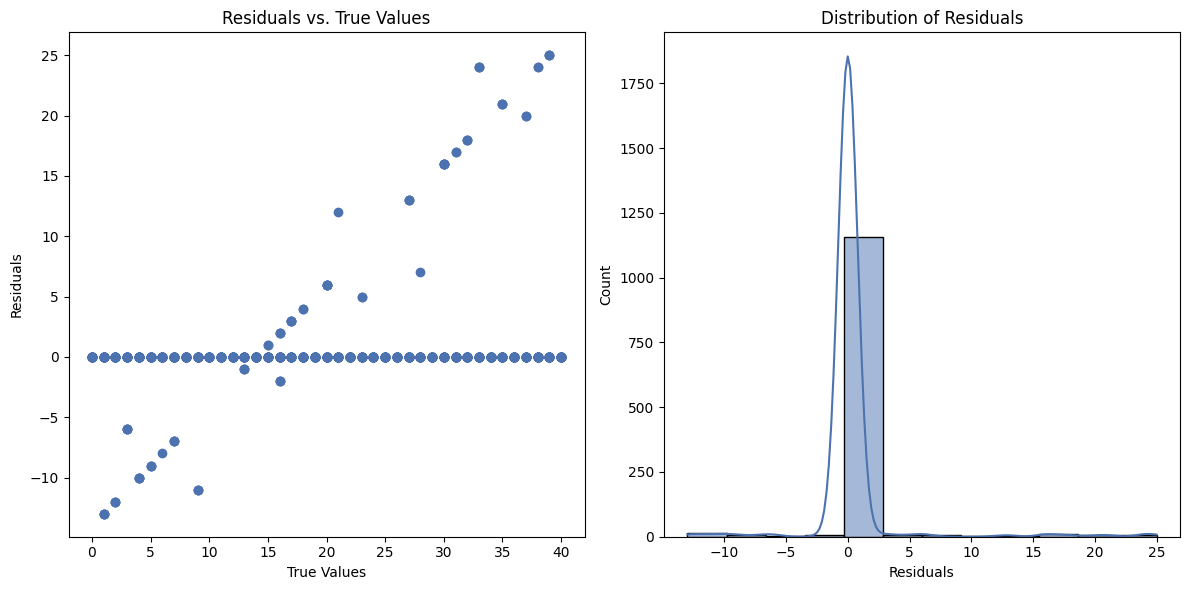

Mean Absolute Percentage Error (MAPE): 0.10%
Root Mean Squared Error (RMSE): 3.28


In [51]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [52]:
feature_names = X.columns.tolist()
target_names = cleaned_df['Disease'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

In [53]:
with open('decision_tree_classifier.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree',view=False)

Image(filename='decision_tree.png')

Score for Logistic Regression:  100.0%
Confusion Matrix:
 [[28  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 34]]


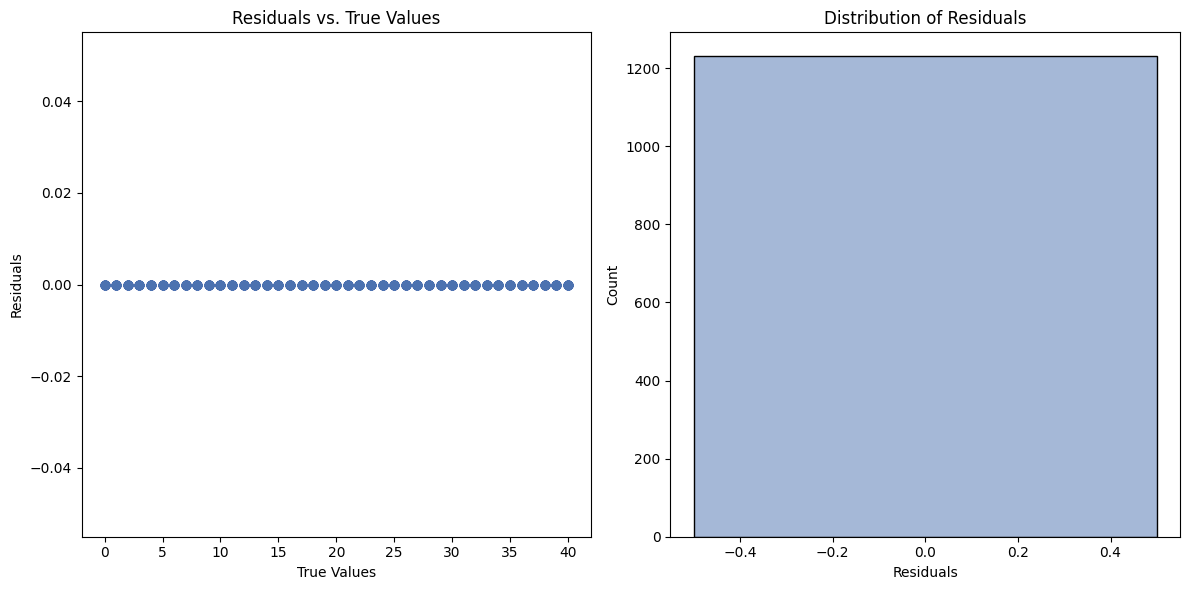

Mean Absolute Percentage Error (MAPE): 0.10%
Root Mean Squared Error (RMSE): 3.28


In [54]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [55]:
cleaned_df.to_csv('cleaned_dataset.csv',index=False)

#### Part 4: Simplifying the Dataset!

In [56]:
# Load the disease classes dataset
disease_classes_path = 'diseaseclasses.csv'
disease_classes_df = pd.read_csv(disease_classes_path)

In [57]:
# Merge your dataset with the disease classes dataset
# It uses 'left' join to keep all records from your dataset and add matching records from the disease classes dataset
merged_dataset = pd.merge(cleaned_df, disease_classes_df, left_on='Disease', right_on='Disease Name', how='left')

# Drop the extra columns if needed (like 'Disease ID' and 'Disease Name' from the disease classes dataset)
merged_dataset.drop(columns=['Disease ID', 'Disease Name'], inplace=True)



In [58]:
merged_dataset.head(20)

cold_hands_and_feets   coma   breathlessness   passage_of_gases  \
0                       0      0                0                  0   
1                       0      0                0                  0   
2                       0      0                0                  0   
3                       0      0                0                  0   
4                       0      0                0                  0   
5                       0      0                0                  0   
6                       0      0                0                  0   
7                       0      0                0                  0   
8                       0      0                0                  0   
9                       0      0                0                  0   
10                      0      0                0                  0   
11                      0      0                0                  0   
12                      0      0                0                  0   
13                      0      0                0                  0   
14                      0      0                0                  0   
15                      0      0                0                  0   
16                      0      0                0                  0   
17                      0      0                0                  0   
18                      0      0                0                  0   
19                      0      0                0                  0   

     anxiety   patches_in_throat   abdominal_pain   diarrhoea   nausea  \
0          0                   0                0           0        0   
1          0                   0                0           0        0   
2          0                   0                0           0        0   
3          0                   0                0           0        0   
4          0                   0                0           0        0   
5          0                   0                0           0        0   
6          0                   0                0           0        0   
7          0                   0                0           0        0   
8          0                   0                0           0        0   
9          0                   0                0           0        0   
10         0                   0                0           0        0   
11         0                   0                0           0        0   
12         0                   0                0           0        0   
13         0                   0                0           0        0   
14         0                   0                0           0        0   
15         0                   0                0           0        0   
16         0                   0                0           0        0   
17         0                   0                0           0        0   
18         0                   0                0           0        0   
19         0                   0                0           0        0   

     fast_heart_rate   vomiting   irritation_in_anus   spinning_movements  \
0                  0          0                    0                    0   
1                  0          0                    0                    0   
2                  0          0                    0                    0   
3                  0          0                    0                    0   
4                  0          0                    0                    0   
5                  0          0                    0                    0   
6                  0          0                    0                    0   
7                  0          0                    0                    0   
8                  0          0                    0                    0   
9                  0          0                    0                    0   
10                 0          0                    0                    0   
11           

In [59]:
merged_dataset.describe()

cold_hands_and_feets         coma   breathlessness   passage_of_gases  \
count            4920.000000  4920.000000      4920.000000        4920.000000   
mean                0.023171     0.024390         0.091463           0.023171   
std                 0.150461     0.154273         0.288296           0.150461   
min                 0.000000     0.000000         0.000000           0.000000   
25%                 0.000000     0.000000         0.000000           0.000000   
50%                 0.000000     0.000000         0.000000           0.000000   
75%                 0.000000     0.000000         0.000000           0.000000   
max                 1.000000     1.000000         1.000000           1.000000   

           anxiety   patches_in_throat   abdominal_pain    diarrhoea  \
count  4920.000000         4920.000000      4920.000000  4920.000000   
mean      0.023171            0.021951         0.209756     0.114634   
std       0.150461            0.146539         0.407176     0.318612   
min       0.000000            0.000000         0.000000     0.000000   
25%       0.000000            0.000000         0.000000     0.000000   
50%       0.000000            0.000000         0.000000     0.000000   
75%       0.000000            0.000000         0.000000     0.000000   
max       1.000000            1.000000         1.000000     1.000000   

            nausea   fast_heart_rate     vomiting   irritation_in_anus  \
count  4920.000000       4920.000000  4920.000000          4920.000000   
mean      0.232927          0.047561     0.389024             0.023171   
std       0.422739          0.212857     0.487578             0.150461   
min       0.000000          0.000000     0.000000             0.000000   
25%       0.000000          0.000000     0.000000             0.000000   
50%       0.000000          0.000000     0.000000             0.000000   
75%       0.000000          0.000000     1.000000             0.000000   
max       1.000000          1.000000     1.000000             1.000000   

        spinning_movements   enlarged_thyroid   sunken_eyes  \
count          4920.000000        4920.000000   4920.000000   
mean              0.021951           0.024390      0.021951   
std               0.146539           0.154273      0.146539   
min               0.000000           0.000000      0.000000   
25%               0.000000           0.000000      0.000000   
50%               0.000000           0.000000      0.000000   
75%               0.000000           0.000000      0.000000   
max               1.000000           1.000000      1.000000   

        ulcers_on_tongue   sinus_pressure   weight_loss  \
count        4920.000000      4920.000000   4920.000000   
mean            0.021951         0.024390      0.092683   
std             0.146539         0.154273      0.290017   
min             0.000000         0.000000      0.000000   
25%             0.000000         0.000000      0.000000   
50%             0.000000         0.000000      0.000000   
75%             0.000000         0.000000      0.000000   
max             1.000000         1.000000      1.000000   

        receiving_unsterile_injections   painful_walking  \
count                      4920.000000       4920.000000   
mean                          0.024390          0.046341   
std                           0.154273          0.210245   
min                           0.000000          0.000000   
25%                           0.000000          0.000000   
50%                           0.000000          0.000000   
75%                           0.000000          0.000000   
max                           1.000000          1.000000   

        swollen_extremeties   swollen_blood_vessels   yellow_crust_ooze  \
count           4920.000000             4920.000000         4920.000000   
mean               0.024390                0.021951            0.023171   
std                0.154273                0.146539            0.150461   
min                0.

In [60]:
merged_dataset.loc[merged_dataset['Disease'] == 'Allergy', 'Disease Class'] = 'allergy'
merged_dataset.loc[merged_dataset['Disease'] == 'Fungal infection', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Acne', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'GERD', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Chronic cholestasis', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Drug Reaction', 'Disease Class'] = 'allergy'
merged_dataset.loc[merged_dataset['Disease'] == 'AIDS', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Diabetes ', 'Disease Class'] = 'acquired metabolic disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Gastroenteritis', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Bronchial Asthma', 'Disease Class'] = 'respiratory system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypertension', 'Disease Class'] = 'cardiovascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Migraine', 'Disease Class'] = 'nervous system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Cervical spondylosis', 'Disease Class'] = 'degenerative disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Paralysis (brain hemorrhage)', 'Disease Class'] = 'nervous system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Jaundice', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Malaria', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Chicken pox', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Dengue', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'hepatitis A', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis B', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis C', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis D', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis E', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Alcoholic hepatitis', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Tuberculosis', 'Disease Class'] = 'respiratory system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Common Cold', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Pneumonia', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Dimorphic hemmorhoids(piles)', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Heart attack', 'Disease Class'] = 'cardiovascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Varicose veins', 'Disease Class'] = 'vascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypothyroidism', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hyperthyroidism', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypoglycemia', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Osteoarthristis', 'Disease Class'] = 'skeletal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Arthritis', 'Disease Class'] = 'skeletal system disease'
merged_dataset.loc[merged_dataset['Disease'] == '(vertigo) Paroymsal  Positional Vertigo', 'Disease Class'] = 'vistibular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Urinary tract infection', 'Disease Class'] = 'Bacterial infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Psoriasis', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Impetigo', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypertension ', 'Disease Class'] = 'cardiovascular system disease'

In [61]:
import plotly.graph_objects as go

disease_class_counts = merged_dataset.groupby(['Disease', 'Disease Class']).size().reset_index(name='Count')

# Preparing data for the Sankey plot
source = []  # Indexes of diseases
target = []  # Indexes of disease classes
value = []   # Count of each disease

# Creating unique lists for diseases and classes
unique_diseases = list(merged_dataset['Disease'].unique())
unique_classes = list(merged_dataset['Disease Class'].unique())

# Creating a mapping for diseases and classes to numeric indexes
disease_to_id = {disease: idx for idx, disease in enumerate(unique_diseases)}
class_to_id = {cls: idx + len(unique_diseases) for idx, cls in enumerate(unique_classes)}

# Filling the source, target, and value lists
for _, row in disease_class_counts.iterrows():
    source.append(disease_to_id[row['Disease']])
    target.append(class_to_id[row['Disease Class']])
    value.append(row['Count'])

# Labels (combining diseases and classes)
labels = unique_diseases + unique_classes

# Creating the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram of Diseases and Their Classes", font_size=10)
fig.show()

In [62]:
merged_dataset.to_csv('your_dataset_with_classes.csv', index=False)

In [63]:
print(cleaned_df['encoded_disease'].unique())

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]


In [64]:
merged_dataset.head()

cold_hands_and_feets   coma   breathlessness   passage_of_gases   anxiety  \
0                      0      0                0                  0         0   
1                      0      0                0                  0         0   
2                      0      0                0                  0         0   
3                      0      0                0                  0         0   
4                      0      0                0                  0         0   

    patches_in_throat   abdominal_pain   diarrhoea   nausea   fast_heart_rate  \
0                   0                0           0        0                 0   
1                   0                0           0        0                 0   
2                   0                0           0        0                 0   
3                   0                0           0        0                 0   
4                   0                0           0        0                 0   

    vomiting   irritation_in_anus   spinning_movements   enlarged_thyroid  \
0          0                    0                    0                  0   
1          0                    0                    0                  0   
2          0                    0                    0                  0   
3          0                    0                    0                  0   
4          0                    0                    0                  0   

    sunken_eyes   ulcers_on_tongue   sinus_pressure   weight_loss  \
0             0                  0                0             0   
1             0                  0                0             0   
2             0                  0                0             0   
3             0                  0                0             0   
4             0                  0                0             0   

    receiving_unsterile_injections   painful_walking   swollen_extremeties  \
0                                0                 0                     0   
1                                0                 0                     0   
2                                0                 0                     0   
3                                0                 0                     0   
4                                0                 0                     0   

    swollen_blood_vessels   yellow_crust_ooze   blister   joint_pain  \
0                       0                   0         0            0   
1                       0                   0         0            0   
2                       0                   0         0            0   
3                       0                   0         0            0   
4                       0                   0         0            0   

    irregular_sugar_level   dark_urine   throat_irritation   brittle_nails  \
0                       0            0                   0               0   
1                       0            0                   0               0   
2                       0            0                   0               0   
3                       0            0                   0               0   
4                       0            0                   0               0   

    swelling_joints   skin_rash   movement_stiffness  \
0                 0           1                    0   
1                 0           1                    0   
2                 0           0                    0   
3                 0           1                    0   
4                 0           1                    0   

    receiving_blood_transfusion   bloody_stool   sweating   redness_of_eyes  \
0                             0              0          0                 0   
1                             0              0          0                 0   
2                             0              0          0                 0   
3                             0              0          0                 0   
4                             0              0   

In [65]:
unique_values = merged_dataset['Disease Class'].unique()
le = LabelEncoder()
le.fit(unique_values)
merged_dataset['encoded_disease_class'] = le.transform(merged_dataset['Disease Class'])
    
merged_dataset.head()

cold_hands_and_feets   coma   breathlessness   passage_of_gases   anxiety  \
0                      0      0                0                  0         0   
1                      0      0                0                  0         0   
2                      0      0                0                  0         0   
3                      0      0                0                  0         0   
4                      0      0                0                  0         0   

    patches_in_throat   abdominal_pain   diarrhoea   nausea   fast_heart_rate  \
0                   0                0           0        0                 0   
1                   0                0           0        0                 0   
2                   0                0           0        0                 0   
3                   0                0           0        0                 0   
4                   0                0           0        0                 0   

    vomiting   irritation_in_anus   spinning_movements   enlarged_thyroid  \
0          0                    0                    0                  0   
1          0                    0                    0                  0   
2          0                    0                    0                  0   
3          0                    0                    0                  0   
4          0                    0                    0                  0   

    sunken_eyes   ulcers_on_tongue   sinus_pressure   weight_loss  \
0             0                  0                0             0   
1             0                  0                0             0   
2             0                  0                0             0   
3             0                  0                0             0   
4             0                  0                0             0   

    receiving_unsterile_injections   painful_walking   swollen_extremeties  \
0                                0                 0                     0   
1                                0                 0                     0   
2                                0                 0                     0   
3                                0                 0                     0   
4                                0                 0                     0   

    swollen_blood_vessels   yellow_crust_ooze   blister   joint_pain  \
0                       0                   0         0            0   
1                       0                   0         0            0   
2                       0                   0         0            0   
3                       0                   0         0            0   
4                       0                   0         0            0   

    irregular_sugar_level   dark_urine   throat_irritation   brittle_nails  \
0                       0            0                   0               0   
1                       0            0                   0               0   
2                       0            0                   0               0   
3                       0            0                   0               0   
4                       0            0                   0               0   

    swelling_joints   skin_rash   movement_stiffness  \
0                 0           1                    0   
1                 0           1                    0   
2                 0           0                    0   
3                 0           1                    0   
4                 0           1                    0   

    receiving_blood_transfusion   bloody_stool   sweating   redness_of_eyes  \
0                             0              0          0                 0   
1                             0              0          0                 0   
2                             0              0          0                 0   
3                             0              0          0                 0   
4                             0              0   

In [66]:
X = merged_dataset.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
X = X.drop('Disease Class',axis=1)
X = X.drop('encoded_disease_class',axis=1)

y = merged_dataset['encoded_disease_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [67]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.01)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

Accuracy of the Decision Tree Classifier: 94.71544715447155%


In [68]:
feature_names = X.columns.tolist()
target_names = merged_dataset['Disease Class'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_class.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

In [69]:
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_class.dot', filled=True)

In [70]:
print(type(target_names[1]))

<class 'str'>


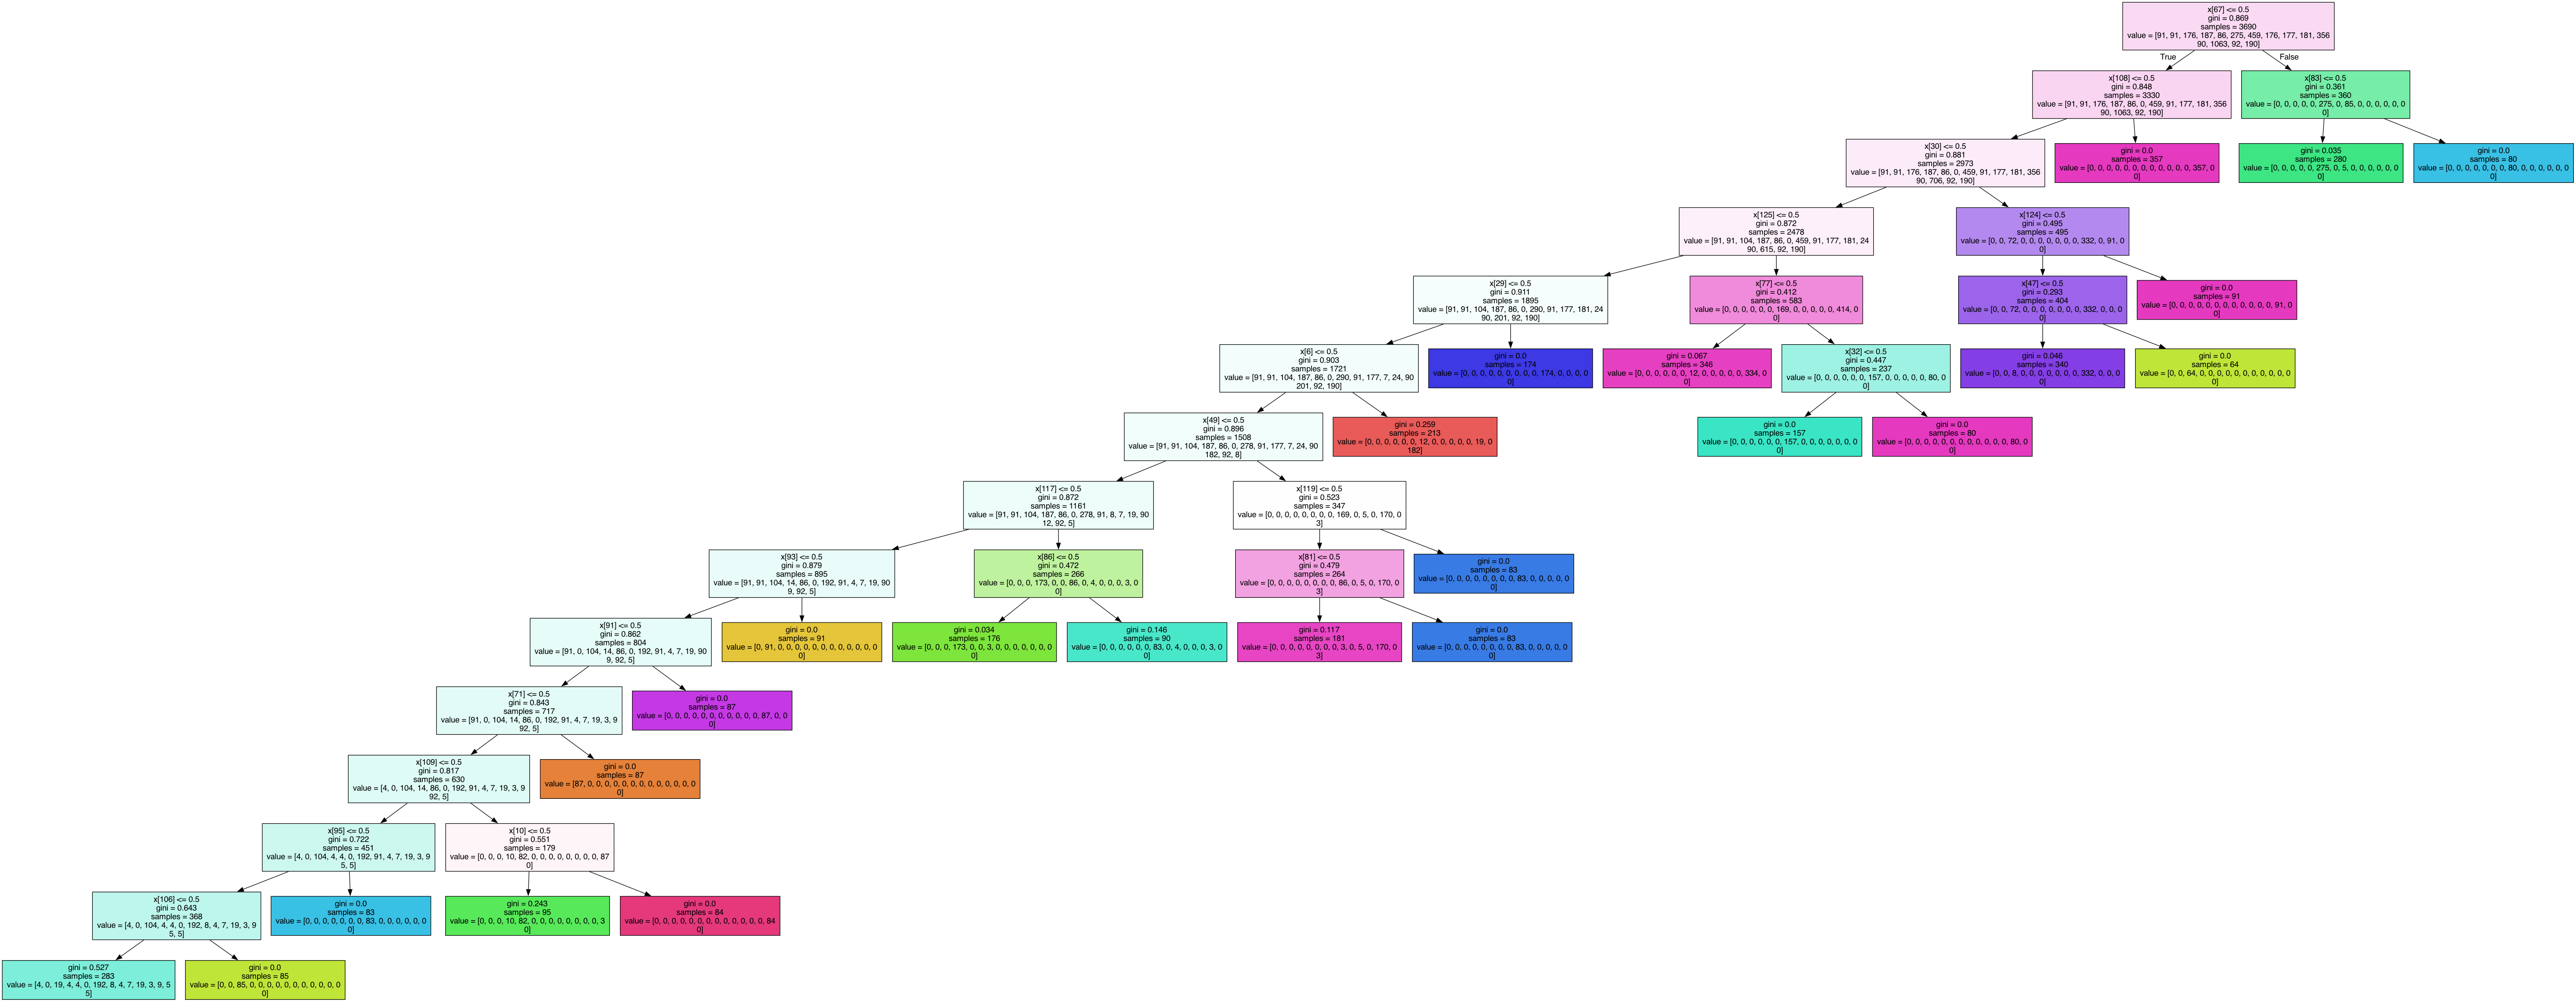

In [71]:
with open('decision_tree_classifier_class.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree',view=False)

Image(filename='decision_tree.png')

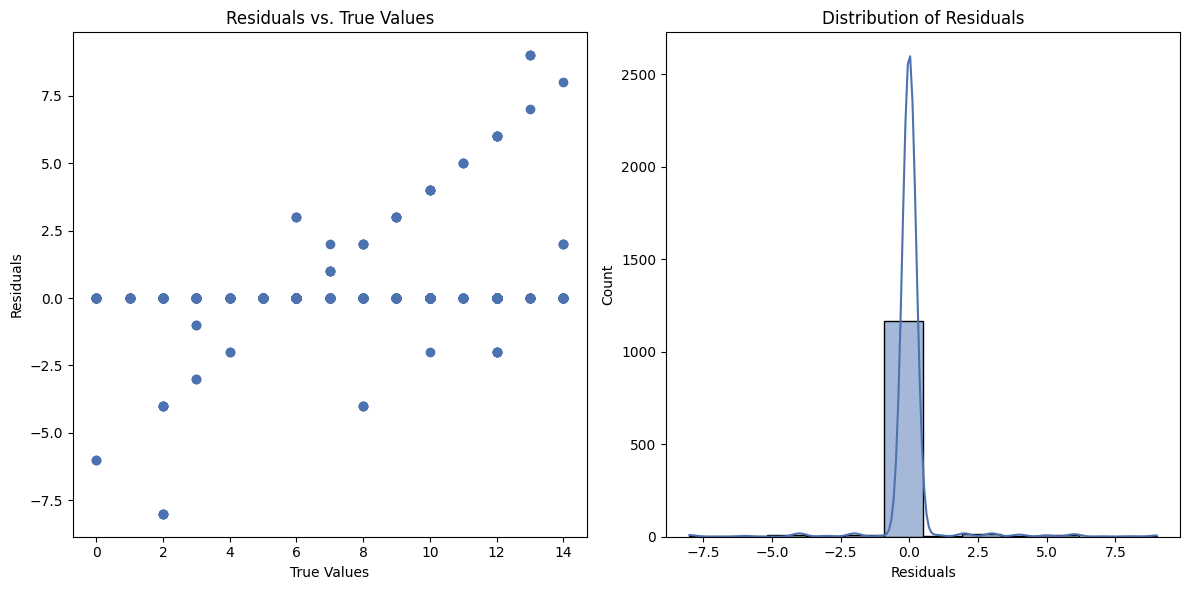

Mean Absolute Percentage Error (MAPE): 43937557340199.99%
Root Mean Squared Error (RMSE): 1.04


In [72]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Score for Logistic Regression:  100.0%
Confusion Matrix:
 [[ 29   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  29   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  64   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 141   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 124   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 377   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  28   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

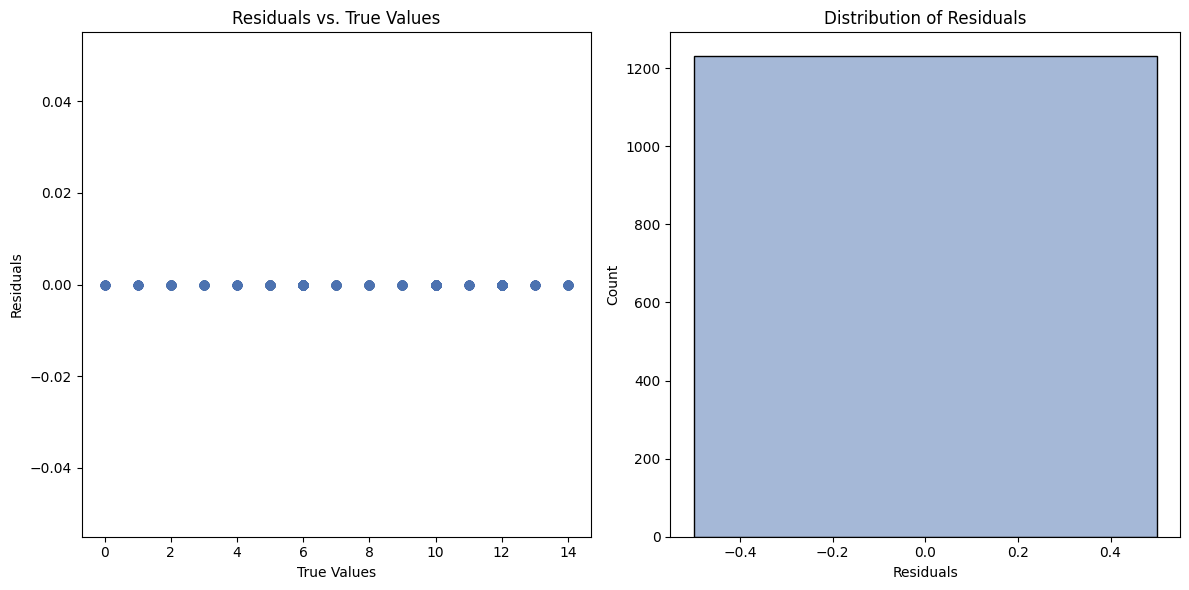

Mean Absolute Percentage Error (MAPE): 43937557340199.99%
Root Mean Squared Error (RMSE): 1.044925795786087


In [75]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")